# Airbnb Data Analysis: NYC Pricing, Demand, and Host Insights

## 1. **Our Objective :**
“Analyze NYC Airbnb listings to uncover insights on pricing trends, demand, reviews, and host behavior, and build reports 
to support better hosting and policy decisions making!.”

Airbnb has thousands of listings in New York, but:

- Hosts don’t know the right price to set.

- Some areas have high demand, others don’t.

- Reviews affect Price.

👉 The problem is that Airbnb and its hosts need data-driven insights about pricing, demand, and customer preferences to improve bookings and revenue.

So for any analysis  we need to follow following steps they are: 
**Buissiness problem understanding -> Data understanding -> Data pre-processing -> Analysis -> Presentation**

## 2. The Data
We have downloaded the dataset from kaagle!


- **Data Loading:** importing the cleaned version of data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("C://Users//Other users//datascience//projects//data analysis//Air Bnb//Data//preprocessed data//airbnb_cleaned.csv")
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,listing_count,availability_365,price_boxcox,reviews_per_month_boxcox
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,5.747923,5.747923
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,6.290030,6.290030
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,5.756616,5.756616
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,58,4.64,1,194,5.088796,5.088796
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,4.955078,4.955078


- **Key Columns:**
neighbourhood_group,
neighbourhood,
latitude,
longitude,
room_type,
price,
minimum_nights,
number_of_reviews,
reviews_per_month,
calculated_host_listings_count,
availability_365

- neighbourhood_group – The main area of NYC where the listing is located (e.g., Manhattan, Brooklyn).
- neighbourhood – The specific neighborhood within that group (e.g., Harlem, Williamsburg).
- latitude – The north–south geographic coordinate of the listing.
- longitude – The east–west geographic coordinate of the listing.
- room_type – Type of space offered (entire home, private room, shared room, etc.).
- price – Nightly price of the listing in USD.
- minimum_nights – Minimum number of nights a guest must book.
- number_of_reviews – Total reviews the listing has received.
- last_review – Date of the most recent review.
- reviews_per_month – Average reviews received per month.
- calculated_host_listings_count – Total active listings the host has on Airbnb.
- availability_365 – Number of days the listing is available in a year.

## 3. Analysis & insights

#### - **Insight 1:** & Pricing Trends:

## Observations:
- More amount of people prefer aibnb lisings between **50 to 100 dollars**
- Mean of **manhattan is:164 dollars , brooklyn :113 dollars - so the listings here should maintain price grater than 100 dollars**
- Prices of minimum nights from 1 to 6 increases gradually and decreases after 6 days
- As expected **renting out entire apt will be costly than private room & shared rooms.**
- More number of people are preffering = **{ private rooms,entire apts }**
- More number of people prefering private rooms and  entire home instead of shared rooms
- **Avg price of entire home is double times of both private,shared room prices**
- **More people visiting manhattan,brookyln** to stay
- The avg price among all neighbourhood_group the highest is manhattan follwed by boorklyn
- **More people who are prefering to stay only shorter days 1 to 7 days**
- The avg price of shroter days staying is slightly less than medium & longer stays.But more people are visiting airbnb listings for shorter days.

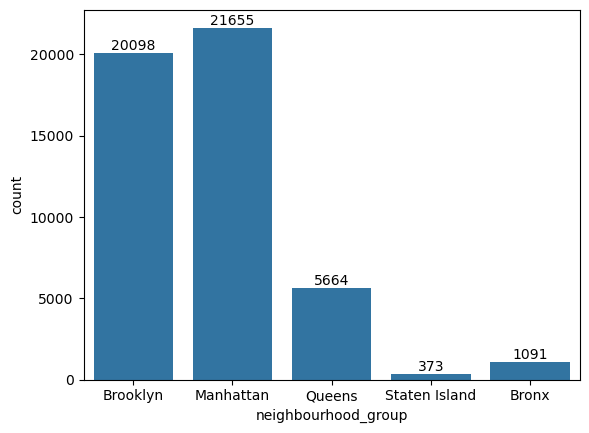

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
ax=sns.countplot(x=df["neighbourhood_group"])
ax.bar_label(ax.containers[0])
plt.show()

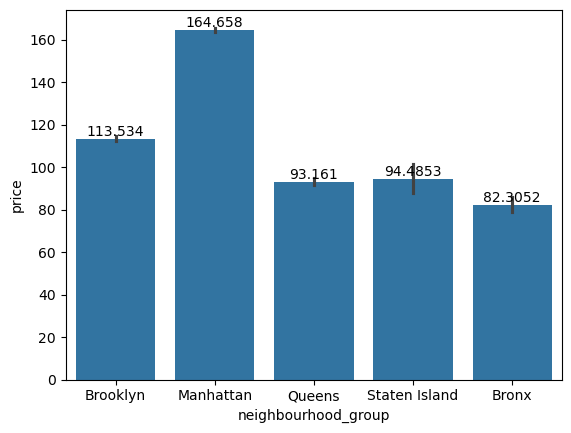

In [3]:
ax = sns.barplot(x="neighbourhood_group", y="price", data=df) 
ax.bar_label(ax.containers[0])  
plt.show()

**Applying Discritization process on minimum nights column**

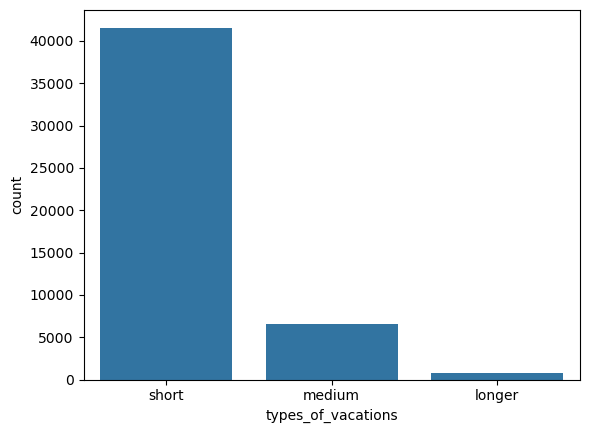

In [4]:
df["types_of_vacations"]=pd.cut(df["minimum_nights"],bins=[0,7,30,365],labels=["short","medium","longer"])
sns.countplot(x=df["types_of_vacations"])
plt.show()

#### - **Insight 2:** Demand & Popularity

### Observations:
- Brooklyn,Manhattan has highest listings (coz of higher count of private ,apt rooms)
- Brooklyn,Mahattan has lowest availability (coz of higher count of private ,apt rooms)
- Brooklyn ,Manhanttan has higher shorter stays (so more people are coming for shorter vacations to stay)
- **Higher the enitire home/apt or private rooms demand will increase!** 
- But coming to reviews queens and staten isalnd has highest rate of review (cuz of low cost)

**Highest Demand Cities: Manhattan , Brooklyn**
- **Reason: Higher listings count,Low availability of days,Higher number of private,apt rooms.**

**Why other cities are less in Demand?**
- **Bronx:less number of listings(only 1091),no reviews(zero reviews) from (2011 to 2013)**
- **Queens: Year=2013 has '0' listings count and '0' reviews , because of that queens has slower rate of demand compared to demanded cities.**
- **Staten Island: less number of listings(only 373),no reviews(zero reviews) from (2011 to 2013)**

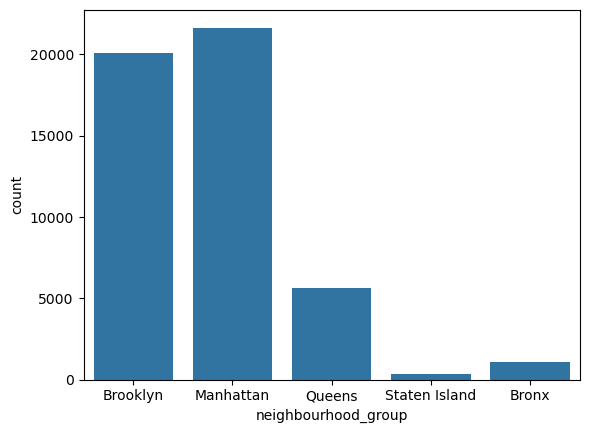

In [5]:
sns.countplot(x=df["neighbourhood_group"])
plt.show()

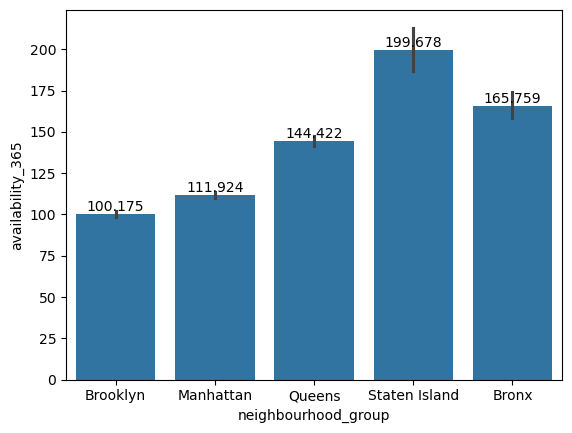

In [6]:
ax=sns.barplot(x=df["neighbourhood_group"],y=df["availability_365"])
ax.bar_label(ax.containers[0])
plt.show()

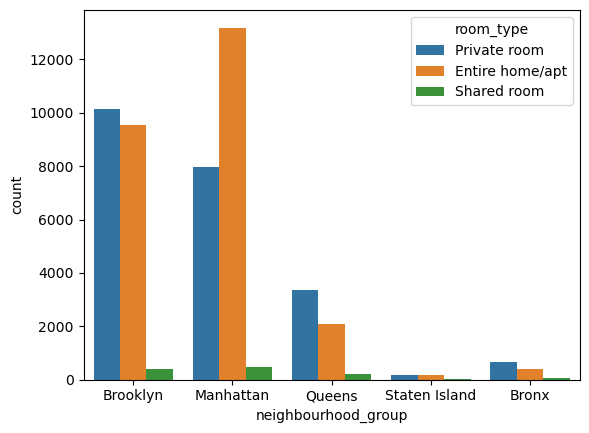

In [7]:
sns.countplot(x=df["neighbourhood_group"],hue=df["room_type"])
plt.show()

#### - **Insight 3:** DOES HIGH NUMBER OF REVIEWS EFFECTS PRICES?

In [13]:
temp=df[["price","number_of_reviews"]]
temp.corr()

,price,number_of_reviews
price,1.000000,-0.066421
number_of_reviews,-0.066421,1.000000


In [18]:
g=df.groupby('neighbourhood_group')
for i,j in g:
    print(i,":",j["price"].mean())

Bronx : 82.30522456461962
Brooklyn : 113.53393372474874
Manhattan : 164.65841607019163
Queens : 93.16101694915254
Staten Island : 94.48525469168901


#### Observations:
- Here we can clearly see that number of reviews doesn't mean that listing has high cost!
- But we can observe that higher number of reviews are leading to low prices of listings.

## **4. Recommendations for New Hosts:**
**Host in a Demanded Market:** Based on your findings, a new host should try to list in **Manhattan or Brooklyn**. These boroughs have a consistently high demand that will help a new listing get booked quickly.

**Price Strategically:** Based on analysis it is certain that the average price in these demanded cities is over 110(in dollars) - Manhattan 164(in dollars), Brooklyn:113(in dollars). Therefore, a new host should set a premium price to match the market. Offering a price that is too low can sometimes make a listing seem less valuable.

**Focus on High-Earning Listings:** We have observed that **Entire homes/apts and Private rooms** are the most popular and have the highest earning potential. A new host should avoid listing a shared room because the demand and price are very low.

**Prioritize Review Quality:** We made a key discovery that the number of reviews doesn't mean a listing will have high price. The most important thing for a new host to do is provide an excellent experience to earn a 5-star rating **(Quality over Quantity)**.


### **Conclusion:**

A new host should focus on providing high-quality listings in the most demanded boroughs, Brooklyn and Manhattan. These areas can support premium pricing for entire apartments and private rooms, which are the most popular listing types. To attract customers and ensure long-term success, a host must prioritize providing excellent service to earn high-quality reviews. By following these data-driven recommendations, a new host can build a successful and profitable listing.